<a href="https://colab.research.google.com/github/rhaagsma/Projeto_Final_Marvel/blob/insight-2/TesteInsights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import csv
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib
import ast

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Top 10 personagens que estão em mais comics

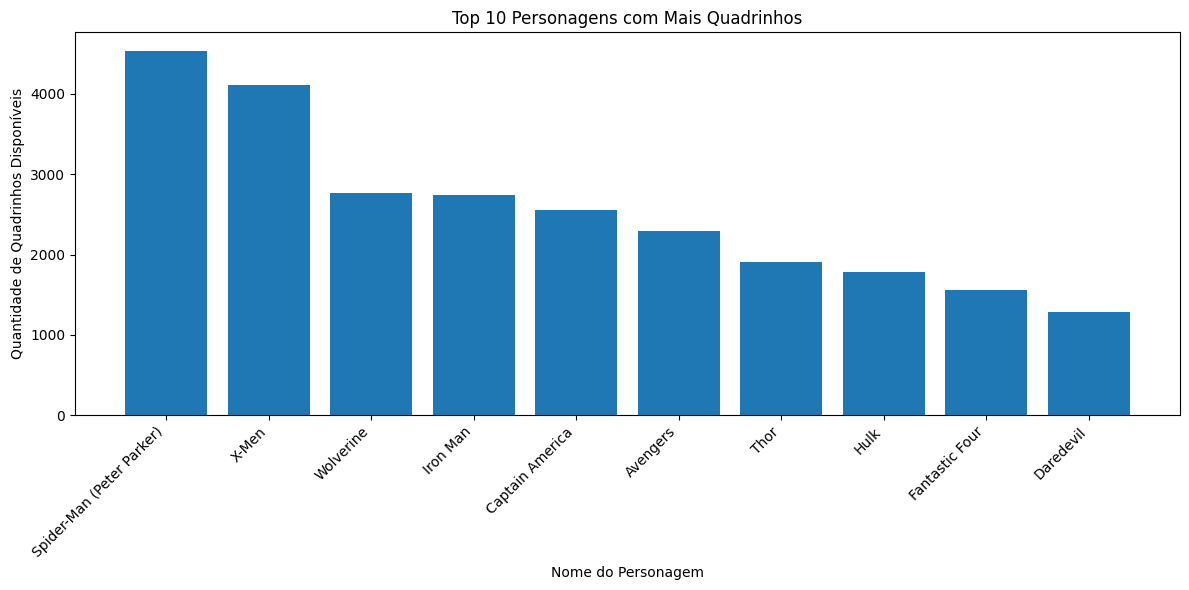

In [98]:
con = sqlite3.connect('banco.db')
query = """
      SELECT
            name,
            comics_available
      FROM characters
      ORDER BY comics_available DESC
      LIMIT 10;
"""
df = pd.read_sql_query(query, con)
con.close()

plt.figure(figsize=(12, 6))
plt.bar(df['name'], df['comics_available'])
plt.xlabel("Nome do Personagem")
plt.ylabel("Quantidade de Quadrinhos Disponíveis")
plt.title("Top 10 Personagens com Mais Quadrinhos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Personagens com mais participações em eventos
 - Top 10 eventos com mais participações
 - Top 10 persoangens por evento

In [106]:
conn = sqlite3.connect('banco.db')

query = """
        SELECT
            e.id AS id,
            e.title AS evento,
            ch.name AS personagem,
            COUNT(*) AS total_participacoes,
            e.amount_comics AS quantidade_comics,
            ROW_NUMBER() OVER (PARTITION BY e.title ORDER BY COUNT(*) DESC) AS posicao
        FROM comics c
        JOIN characters_comics cc ON cc.comic_id = c.id
        JOIN characters ch ON cc.character_id = ch.id
        JOIN comics_events ce ON ce.comic_id = c.id
        JOIN events e ON ce.event_id = e.id
        GROUP BY e.id, e.title, ch.name
        ORDER BY quantidade_comics DESC
"""

df = pd.read_sql_query(query, conn)

conn.close()

In [111]:
result_df = (df[df['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
result_df[colunas_desejadas]

,evento,personagem,total_participacoes,quantidade_comics
0,Dark Reign,Norman Osborn,28,199
1,Secret Invasion,Skrulls,40,163
2,Civil War,Iron Man,44,138
3,Secret Wars (2015),Avengers,9,138
4,Initiative,Iron Man,24,96
5,Fear Itself,Iron Man,14,87
6,Original Sin,Avengers,15,68
7,House of M,X-Men,23,67
8,Secret Empire,Captain America,13,66
9,Siege,Thor,12,64


In [113]:
result_df = (df[df['posicao'].isin(range(1,11))]).reset_index(drop=True)
colunas_desejadas = ['evento', 'personagem', 'total_participacoes', 'quantidade_comics']
result_df[colunas_desejadas]

,evento,personagem,total_participacoes,quantidade_comics
0,Dark Reign,Norman Osborn,28,199
1,Dark Reign,Spider-Man (Peter Parker),22,199
2,Dark Reign,Iron Man,20,199
3,Dark Reign,Dark Avengers,17,199
4,Dark Reign,Thunderbolts,16,199
5,Dark Reign,Wolverine,14,199
6,Dark Reign,The Hood,13,199
7,Dark Reign,Captain Marvel (Carol Danvers),12,199
8,Dark Reign,X-Men,12,199
9,Dark Reign,Daken,11,199


### Quais personagens estavam presentes em mais comics por década?
 - Top 10 personagens por década

In [122]:
conn = sqlite3.connect('banco.db')

query = """
    SELECT
        ch.id AS id,
        (c.year / 10) * 10 AS decade,
        ch.name AS personagem,
        COUNT(*) as participacoes,
        ROW_NUMBER() OVER (PARTITION BY (c.year / 10) * 10  ORDER BY COUNT(*) DESC) AS posicao
    FROM comics c
    JOIN characters_comics cc ON cc.comic_id = c.id
    JOIN characters ch ON cc.character_id = ch.id
    WHERE decade != 0
    GROUP BY ch.id, ch.name, decade
    ORDER BY decade, participacoes DESC
"""
df_decade = pd.read_sql_query(query, conn)

conn.close()

df_decade.head(10000)

,id,decade,personagem,participacoes,posicao
0,1009356,1930,Human Torch,88,1
1,1010791,1930,Sub-Mariner,88,2
2,1009159,1930,Archangel,77,3
3,1009492,1930,Patriot,49,4
4,1011424,1930,Miss America,37,5
5,1009697,1930,Vision,36,6
6,1011081,1930,Ka-Zar,23,7
7,1009287,1930,Electro,16,8
8,1009220,1930,Captain America,11,9
9,1011416,1930,Blonde Phantom,8,10


In [124]:
decade_df = (df_decade[df_decade['posicao'] == 1]).reset_index(drop=True)
colunas_desejadas = ['decade', 'personagem', 'participacoes']
decade_df[colunas_desejadas]

,decade,personagem,participacoes
0,1930,Human Torch,88
1,1940,Two-Gun Kid,127
2,1950,Rawhide Kid,116
3,1960,Thor,553
4,1970,Spider-Man (Peter Parker),390
5,1980,X-Men,863
6,1990,Spider-Man (Peter Parker),807
7,2000,X-Men,1000
8,2010,Spider-Man (Peter Parker),840
9,2020,X-Men,456
